# Make IDs in left and right hemisphere different in annotation volume
This notebook divides right and left side of an annotation volume by adding a constant to IDs in the right side of the brain. Note that a ROI for root_peri is excluded here (ID for root_peri in AV is changed from 1000000028 to 0). 

- input
    - AVbase_d_g_f.nrrd
- output
    - AVbase_d_g_f_LR.nrrd

In [29]:
dir_data = 'data'

# detailed ROI using data for gene expression and fiber innervation
fn_input_AV_ori = 'AVbase_d_g_f.nrrd'
fn_output_AV_update = 'AVbase_d_g_f_LR.nrrd'

In [ ]:
id_spacer = 2*10**9 # this number is added to ID in the right hemisphere of annotation volume
id_root_peri = 1000000028 # For deleting a ROI for root_peri

In [28]:
import os
import nrrd
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import math

# just used for displaying data
SliceIdx = 84
CoronalIdx = np.linspace(43,53,3)

# Load data

In [30]:
AV_ori, header = nrrd.read(os.path.join(dir_data, fn_input_AV_ori))

# Update ID in AV to reflect gene expression

In [31]:
AV_update = copy.deepcopy(AV_ori)
AV_update[:,:,-57:] = AV_ori[:,:,-57:] + id_spacer
AV_update[AV_ori == 0] = 0
AV_update[AV_ori == id_root_peri] = 0

# Save AV

In [32]:
nrrd.write(os.path.join(dir_data, fn_output_AV_update), AV_update, header)

# Check data

## original AV

annotation volume


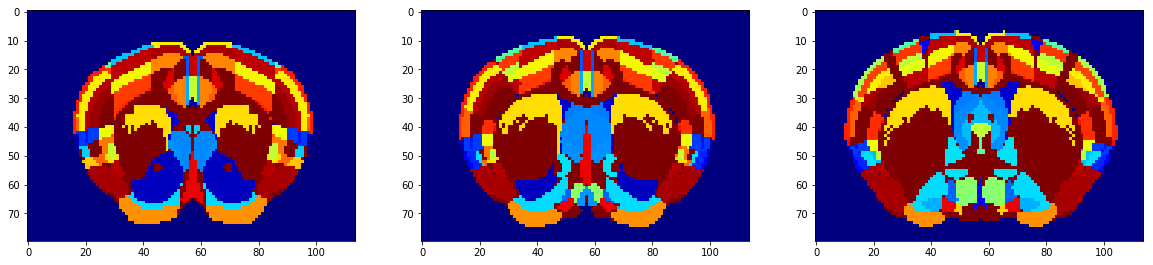

In [33]:
print('annotation volume')
slices = [int(x) for x in CoronalIdx.round()]
fig1, ax1 = plt.subplots(1,len(CoronalIdx), figsize=(20,28), facecolor='w')
for count, idx in enumerate(slices):
    H1 = ax1[count].imshow(AV_ori[idx,:,:], cmap='jet', vmin=0, vmax=1000)
#    ax1[count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

In [34]:
# max ID in original AV should be smaller than id_spacer, and should be smaller than 2^32
print(id_spacer)
print(AV_ori.max())
print(math.log10(AV_ori.max()))
print(math.log10(2**32))
print(10**9)
print(2**32)

2000000000
1000000030
9.000000013028835
9.632959861247398
1000000000
4294967296


## updated AV

annotation volume


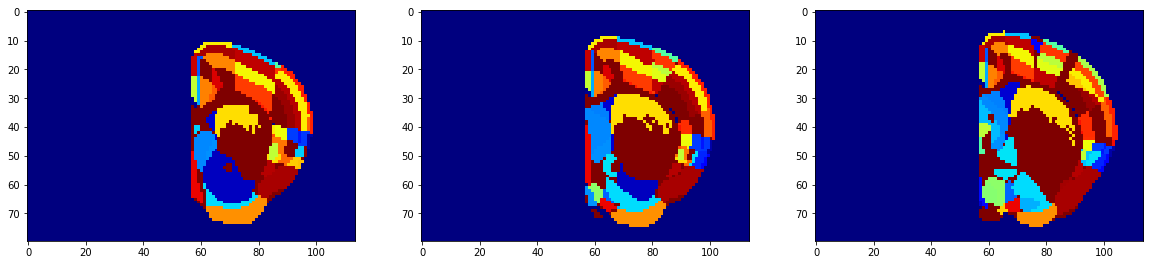

In [35]:
print('annotation volume')
slices = [int(x) for x in CoronalIdx.round()]
fig1, ax1 = plt.subplots(1,len(CoronalIdx), figsize=(20,28), facecolor='w')
for count, idx in enumerate(slices):
    H1 = ax1[count].imshow(AV_update[idx,:,:], cmap='jet', vmin=2000000000, vmax=2000001000)
#    ax1[count].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

In [36]:
print(AV_update.max())

3000000030
